# Samsung stock prize prediction


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
samsung = pd.read_csv('Samsung.csv') 

In [3]:
samsung

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4651.737793,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4248.232422,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4278.686523,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4217.780273,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4392.884766,46880000
...,...,...,...,...,...,...,...
5616,2022-05-17,66600.0,67900.0,66600.0,67600.0,67600.000000,15680447
5617,2022-05-18,68300.0,68700.0,67600.0,68100.0,68100.000000,16486319
5618,2022-05-19,66500.0,67600.0,66500.0,67500.0,67500.000000,17073727
5619,2022-05-20,67800.0,68400.0,67700.0,68000.0,68000.000000,12109671


In [4]:
samsung = samsung.reset_index()['Close']

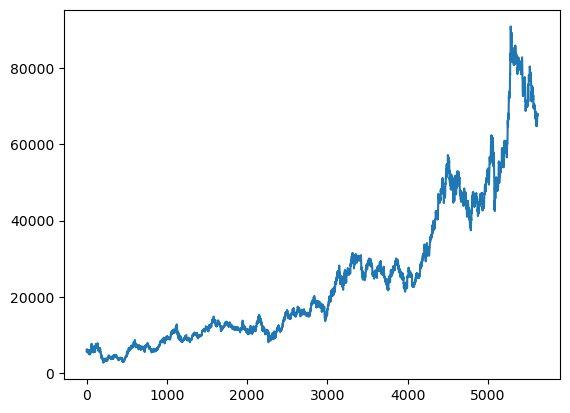

In [5]:
plt.plot(samsung)

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))


In [11]:
samsung = scaler.fit_transform(np.array(samsung).reshape(-1,1))

In [12]:
samsung

array([[0.03829161],
       [0.0322873 ],
       [0.03274046],
       ...,
       [0.73377138],
       [0.73943582],
       [0.73830293]])

In [13]:
## split the data into train and test

In [14]:
training_size = int(len(samsung)*0.65)
test_size = len(samsung)-training_size
train_data,test_data = samsung[0:training_size,:],samsung[training_size:len(samsung),:1]

In [15]:
training_size , test_size

(3653, 1968)

In [16]:


def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)


In [17]:
print(x_test.shape),print(y_test.shape)

(1867, 100)
(1867,)


(None, None)

In [18]:
print(x_train.shape),print(y_train.shape)

(3552, 100)
(3552,)


(None, None)

In [19]:
# reshape 
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [20]:
#create the LSTM model

In [21]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [22]:
#compile and train model
model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.fit(x_train, y_train,validation_data=(x_test,y_test) ,epochs=100, batch_size=64 ,verbose=1)

Epoch 1/100
56/56 [==============================] - 18s 212ms/step - loss: 0.0012 - val_loss: 6.1376e-04
Epoch 2/100
56/56 [==============================] - 10s 184ms/step - loss: 5.6281e-05 - val_loss: 7.8465e-04
Epoch 3/100
56/56 [==============================] - 10s 187ms/step - loss: 5.4132e-05 - val_loss: 0.0011
Epoch 4/100
56/56 [==============================] - 10s 185ms/step - loss: 5.0406e-05 - val_loss: 0.0010
Epoch 5/100
56/56 [==============================] - 10s 185ms/step - loss: 5.0246e-05 - val_loss: 0.0014
Epoch 6/100
56/56 [==============================] - 10s 184ms/step - loss: 5.0505e-05 - val_loss: 9.7009e-04
Epoch 7/100
56/56 [==============================] - 10s 183ms/step - loss: 4.6949e-05 - val_loss: 0.0015
Epoch 8/100
56/56 [==============================] - 10s 184ms/step - loss: 4.5694e-05 - val_loss: 0.0012
Epoch 9/100
56/56 [==============================] - 10s 188ms/step - loss: 4.3436e-05 - val_loss: 8.1540e-04
Epoch 10/100
56/56 [==============

# Prediction  

In [25]:
#prediction 
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

59/59 [==============================] - 2s 25ms/step


In [26]:
#original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [27]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


15221.929171635462

In [28]:
math.sqrt(mean_squared_error(y_test,test_predict))

50388.76162717783

In [30]:
look_back = 100
trainPredictPlot = np.empty_like(samsung)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(samsung)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(samsung)-1, :] = test_predict


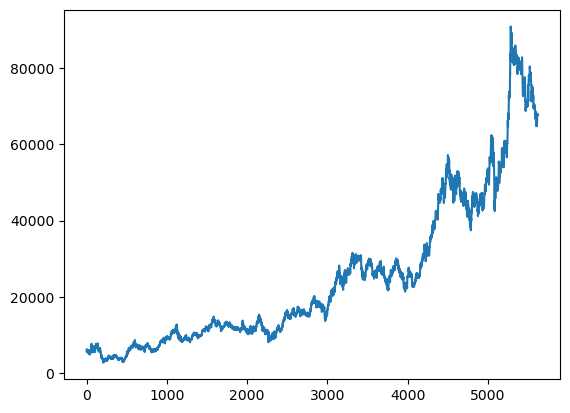

In [32]:
plt.plot(scaler.inverse_transform(samsung))
plt.show()

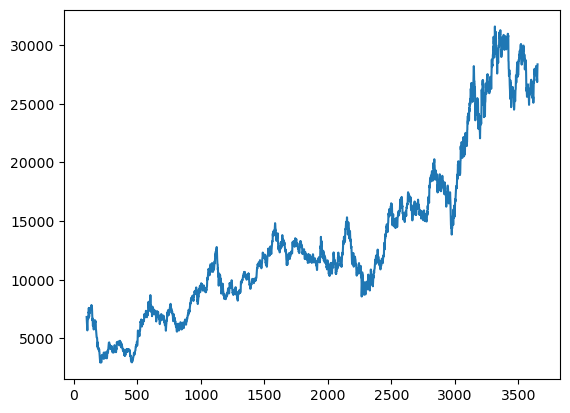

In [33]:
plt.plot(trainPredictPlot)
plt.show()

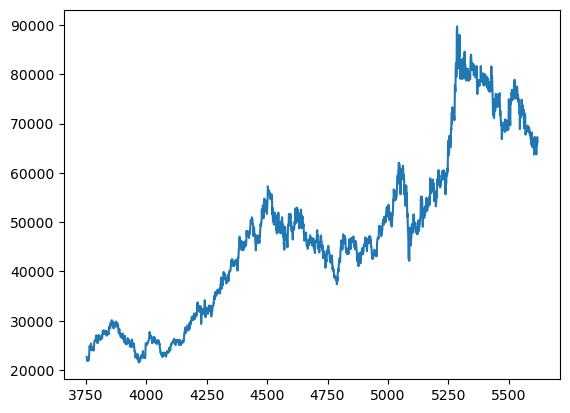

In [34]:
plt.plot(testPredictPlot)
plt.show()

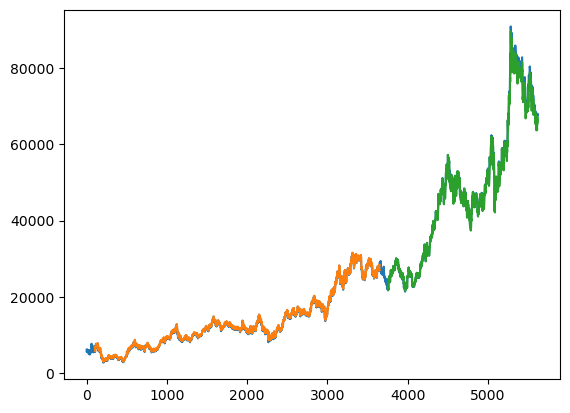

In [31]:
plt.plot(scaler.inverse_transform(samsung))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show